# Predicting Car Prices #

In this project, we'll use machine learning to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
#We found the columns name on the link above
cars = pd.read_csv("imports-85.data",names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price'])
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's determine which columns are numeric and can be used as features and which column is the target column.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [4]:
# We only select the columns with continuous values
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[continuous_cols]

### Missing values ### 
We can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. 

In [5]:
cars["normalized-losses"].value_counts().head()

?      41
161    11
91      8
150     7
128     6
Name: normalized-losses, dtype: int64

In [6]:
cars["normalized-losses"] = cars["normalized-losses"].replace("?",np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


Let's do the same for the other columns :

In [7]:
object_column = ['horsepower','peak-rpm','price','normalized-losses','bore','stroke']

cars[object_column] = cars[object_column ].replace("?", np.nan)
cars[object_column] = cars[object_column ].astype(float)

We still have some missing values in our rows

In [8]:
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The most import column for us is the "price" one as we want to predict it.

Let's remove the rows without a price and for the other columns we will fill them with the mean of the column.

In [9]:
cars = cars.dropna(subset=['price'])
cars = cars.fillna(cars.mean())

### Normalize the values ###

now we can rescale the values in the numeric columns so they all range from 0 to 1, except for the price.

In [10]:
all_but_price = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']

cars[all_but_price] = (cars[all_but_price]-cars[all_but_price].min())/(cars[all_but_price].max()-cars[all_but_price].min())
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariate k-nearest neighbors model ###

Let's start with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col,target_col,df):
    np.random.seed(1)

    #first let's shuffle our dataset
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df[:round(len(df)/2)]
    test_df = random_df[round(len(df)/2):]
    
    # Fit a KNN model using default k value.
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col]],train_df[target_col])
    
    # Make predictions using model.
    predictions = knn.predict(test_df[[training_col]])
    
    #Calculating the rmse
    rmse = (mean_squared_error(test_df[target_col],predictions))**(1/2)
    return rmse

In [12]:
rmses = {}
for column in all_but_price:
    rmses[column] = knn_train_test(column,'price',cars)
    
rmses = pd.DataFrame.from_dict(rmses, orient = 'index')
rmses = rmses.rename(columns = {0 : 'rmse'})


In [13]:
rmses = rmses.sort_values(by = 'rmse', ascending = True)
rmses

,rmse
horsepower,4037.037713
curb-weight,4401.118255
highway-mpg,4630.026799
width,4704.482590
city-mpg,4766.422505
length,5427.200961
wheel-base,5461.553998
compression-rate,6610.812153
bore,6780.627785
normalized-losses,7330.197653


Now let's modify a bit our function to accept a parameter for the k value.

In [14]:
def knn_train_test_k(training_col,target_col,df):
    np.random.seed(1)

    #first let's shuffle our dataset
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df[:round(len(df)/2)]
    test_df = random_df[round(len(df)/2):]
    
    k_list = [1, 3, 5, 7, 9]
    k_rmses = {}
    for k in k_list:
        # Fit a KNN model using the k value.
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[training_col]],train_df[target_col])

        # Make predictions using model.
        predictions = knn.predict(test_df[[training_col]])

        #Calculating the rmse
        rmse = (mean_squared_error(test_df[target_col],predictions))**(1/2)
        k_rmses[k] = rmse
    return k_rmses


In [15]:
rmses_k = {}

for column in all_but_price:
    rmses_k[column] = knn_train_test_k(column,'price',cars)

rmses_k

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [16]:
rmses_k_df = pd.DataFrame.from_dict(rmses_k)
rmses_k_df = rmses_k_df.reindex(sorted(rmses_k_df.columns), axis = 1)
rmses_k_df

,bore,city-mpg,compression-rate,curb-weight,height,highway-mpg,horsepower,length,normalized-losses,peak-rpm,stroke,wheel-base,width
1,8602.588485,5901.143574,8087.205347,5264.290231,8904.046456,6025.594967,4170.054848,4628.455501,7846.750605,9511.480068,9116.495955,4493.734069,4559.257298
3,6984.239489,4646.746409,7375.063686,5022.318012,8277.609643,4617.305020,4020.849263,5129.835821,7500.569812,8537.550900,7338.684670,5120.161506,4606.413692
5,6780.627785,4766.422505,6610.812153,4401.118255,8144.441043,4630.026799,4037.037713,5427.200961,7330.197653,7697.459696,8006.529545,5461.553998,4704.482590
7,6878.097966,5232.523034,6732.801283,4330.608104,7679.598124,4796.061440,4353.811860,5313.427721,7756.421586,7510.294160,7803.937797,5448.107051,4571.485046
9,6866.808502,5465.209493,7024.485525,4632.044474,7811.036063,5278.358057,4515.135617,5383.054515,7688.096097,7340.041341,7735.554366,5738.405685,4652.914172


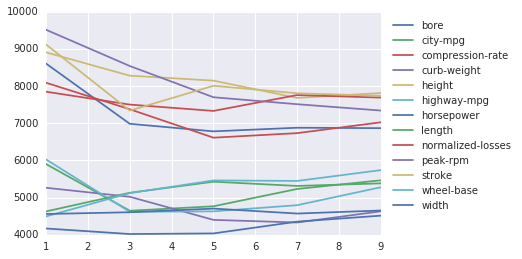

In [17]:
%matplotlib inline

rmses_k_df.plot()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.show()

### Multivariate Model 

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [18]:
def knn_train_test(training_col,target_col,df):
    np.random.seed(1)
    
    #first let's shuffle our dataset
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df[:round(len(df)/2)]
    test_df = random_df[round(len(df)/2):]

    # Fit a KNN model using the default k value.
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_col],train_df[target_col])

    # Make predictions using model.
    predictions = knn.predict(test_df[training_col])

    #Calculating the rmse
    rmse = (mean_squared_error(test_df[target_col],predictions))**(1/2)
    return rmse

In [19]:
knn_train_test(all_but_price,'price',cars)

4163.854606177567

Let's try some combinations with the best 2,3,4 and 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

The top 5 for k = 5 was : 

| column        | rmse        |  
| -----------   | ----------- |
| curb-weight	| 3995.559871 |
| horsepower	| 4291.372416 |
| highway-mpg	| 4313.859239 |
| width	        | 4550.788314 |
| city-mpg	    | 6262.415367 |


However let's compute the mean of the rmse with the differents k to be sure to take the best parameters!

In [20]:
rmses_k_df.mean().sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

We will take this top 5 for the next step :

-  width                
-  horsepower          
-  curb-weight          
-  highway-mpg          
-  length               

In [21]:
knn_train_test(['width','horsepower'],'price',cars)

3589.3132622073304

In [22]:
knn_train_test(['curb-weight','width','horsepower'],'price',cars)

3305.9401397969677

In [23]:
knn_train_test(['curb-weight','horsepower','highway-mpg','width'],'price',cars)

3358.6915801682458

In [24]:
knn_train_test(['curb-weight','horsepower','highway-mpg','width','length'],'price',cars)

3665.546673045813

We are getting better results with the 3 'top' column rather than with all columns.

### Hyperparameter Tuning

Now let's optimize our best models (so the 3/4/2 columns models) by varying the hyperparameter value from 1 to 25!



In [25]:
def knn_train_test_25(training_col,target_col,df):
    np.random.seed(1)

    #first let's shuffle our dataset
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df[:round(len(df)/2)]
    test_df = random_df[round(len(df)/2):]
    
    k_list = [i for i in range(1,26)]
    k_rmses = {}
    for k in k_list:
        # Fit a KNN model using the k value.
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[training_col],train_df[target_col])

        # Make predictions using model.
        predictions = knn.predict(test_df[training_col])

        #Calculating the rmse
        rmse = (mean_squared_error(test_df[target_col],predictions))**(1/2)
        k_rmses[k] = rmse
    return k_rmses

In [26]:
top_models_columns = [['curb-weight','width','horsepower'],['curb-weight','horsepower','highway-mpg','width'],['width','horsepower']]

rmses_25 = {}

for columns in top_models_columns:
    rmses_25[str(columns)] =  knn_train_test_25(columns,'price',cars)

rmses_25     



{"['curb-weight', 'horsepower', 'highway-mpg', 'width']": {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 4528.57927503009,
  17: 4572.28806185627,
  18: 4604.034045947238,
  19: 4660.524954508328,
  20: 4735.352015758023,
  21: 4742.329532242572,
  22: 4763.606459864159,
  23: 4807.076030845482,
  24: 4848.127192424658,
  25: 4873.610609928121},
 "['curb-weight', 'width', 'horsepower']": {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 420

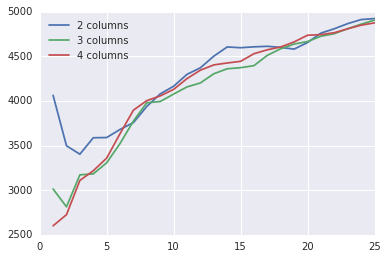

In [27]:
rmses_25_df = pd.DataFrame.from_dict(rmses_25)
rmses_25_df = rmses_25_df.rename(columns = {"['curb-weight', 'horsepower', 'highway-mpg', 'width']" : "4 columns",
       "['curb-weight', 'width', 'horsepower']" : "3 columns", "['width', 'horsepower']" : "2 columns"})
rmses_25_df = rmses_25_df.reindex(sorted(rmses_25_df.columns), axis = 1)

fig = rmses_25_df.plot()
fig.set_xlim(0,25)
plt.show()

It seems that the optimal value for k is 1, with the 4 top columns we identified.

### k-fold cross validation 

Finally let's modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.

In [35]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test_cross(training_col,target_col,df):
        
    k_list = [i for i in range(1,11)]
    cross_rmses = {}
    
    for k in k_list:
            
        kf = KFold(10, shuffle = True, random_state = 1)

        # Fit a KNN model using the k value.
        knn = KNeighborsRegressor(n_neighbors = k)

        #Calculating the mse
        mse = cross_val_score(knn, df[training_col],df[target_col], scoring = 'neg_mean_squared_error', cv = kf)
        
        rmse = (np.abs(mse))**(1/2)
        cross_rmses[k] = rmse.mean()
    return cross_rmses

In [38]:
top_models_columns = [['curb-weight','width','horsepower'],['curb-weight','horsepower','highway-mpg','width'],['width','horsepower']]

rmses_cross = {}

for columns in top_models_columns:
    rmses_cross[str(columns)] =  knn_train_test_cross(columns,'price',cars)
    
rmses_cross

{"['curb-weight', 'horsepower', 'highway-mpg', 'width']": {1: 2418.8867783985334,
  2: 2679.1772619676663,
  3: 2757.6544935781976,
  4: 2866.467311112034,
  5: 2858.9800927894566,
  6: 2985.151559063382,
  7: 3149.4350449075464,
  8: 3227.5627041693424,
  9: 3298.1456135640583,
  10: 3369.305399583043},
 "['curb-weight', 'width', 'horsepower']": {1: 2595.9766545021407,
  2: 2675.3635296736975,
  3: 2834.781466255468,
  4: 2960.8231360896925,
  5: 2955.6940990670482,
  6: 2988.568481388776,
  7: 3071.0384605438057,
  8: 3130.627767421307,
  9: 3214.3691361466817,
  10: 3265.370902843248},
 "['width', 'horsepower']": {1: 3945.926445640179,
  2: 3339.1428622296567,
  3: 3191.0393204569473,
  4: 3249.231646290102,
  5: 3311.7487982803564,
  6: 3379.582121346202,
  7: 3486.833394737793,
  8: 3551.070227507616,
  9: 3677.4173116345737,
  10: 3714.7157928537054}}

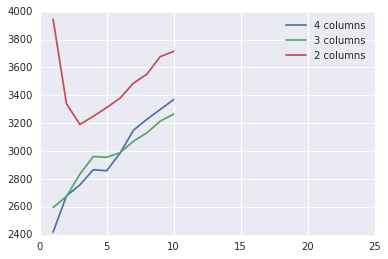

In [39]:
rmses_cross_df = pd.DataFrame.from_dict(rmses_cross)
rmses_cross_df = rmses_cross_df.rename(columns = {"['curb-weight', 'horsepower', 'highway-mpg', 'width']" : "4 columns",
       "['curb-weight', 'width', 'horsepower']" : "3 columns", "['width', 'horsepower']" : "2 columns"})

fig = rmses_cross_df.plot()
fig.set_xlim(0,25)
plt.show()

### Conclusions : 

First we can see that, of course, the k-fold cross validation is more accurate.

Once again, thanks to the k-fold cross validation, we can see that using the 4 'top' columns is still the best choice, with a n_neighbors = 1.

